# Práctica 6
## Propuesta: Intento de sistema de reconocimiento facial y reacciones según datos de DeepFace
<ul>
<li>Nikhil Chandru Durgadas Chellaram</li>
<li>Raúl Mateus Sánchez</li>
</ul>

Para comprobar el desarrollo de la práctica: https://github.com/raulmat19/Vision-por-Computador/tree/main/Practica-6

In [1]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt
import os

In [2]:
models = ["VGG-Face","Facenet","Facenet512","OpenFace","DeepFace","DeepID","ArcFace","Dlib","SFace"]

metrics = ["cosine", "euclidean", "euclidean_l2"]

backends = ['opencv','ssd','dlib','mtcnn','retinaface','mediapipe']

In [3]:
def draw_text(img, text,
          font=cv2.FONT_HERSHEY_SIMPLEX,
          pos=(0, 0),
          font_scale=3,
          font_thickness=2,
          text_color=(255, 255, 255),
          text_color_bg=(0, 0, 0)
          ):

    x, y = pos
    text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)
    text_w, text_h = text_size
    cv2.rectangle(img, pos, (x + text_w + 5, y + text_h + 5), text_color_bg, -1)
    cv2.putText(img, text, (x, int(y + text_h + font_scale - 1)), font, font_scale, text_color, font_thickness)

    return text_size

Con este pequeño sistema, se permite al usuario registrar su cara en el sistema con la finalidad de simular un sistema de reconocimiento facial así como prodecer a las reacciones propuestas empleando las utilidades de DeepFace

In [4]:
def getFace(path, name):
    vid = cv2.VideoCapture(0)
    counter = 0

    while(True):      
        # fotograma a fotograma
        ret, frame = vid.read()

        if ret:
            draw_text(frame, f"{counter}", font_scale=1, pos=(50, 10), text_color_bg=(0, 0, 0))
            cv2.imshow('Cam', frame)   

        key = cv2.waitKey(5)     
        # Detenemos pulsado ESC
        if key and key == 27 or counter == 3:
            break
        elif key and key == 32:
            if counter > 0:
                new_path = path + '/' + name + str(counter) + '.jpg'
            
            else:
                new_path = path + '/' + name + '.jpg'

            cv2.imwrite(new_path, frame)
            counter += 1
            
            
    # Libera el objeto de captura
    vid.release()
    # Destruye ventanas
    cv2.destroyAllWindows()

In [5]:
face_loaded = False

data_loaded = input ("Si su cara ha sido ya registrada, introduzca 'Si'. En caso contrario, introduzca 'No' o cualquier cosa")
if data_loaded == 'Si' or data_loaded == 'si':
    face_loaded = True

if not face_loaded:
    data = False
    escape = 0

    while not data:

        name = input ("Introduce tu nombre: ")
        surname = input ("Introduce tus apellidos: ")
        age = input ("Introduce tu edad: ")
        sexo = input ("Introduce tu sexo: ")
        workingStatus = input ("Introduce tu ocupación: ")

        if name == '' or surname == '' or age == '' or sexo == '' or workingStatus == '':
            warning = input ("Datos incorrectos. Pulse Enter para volver a introducirlos")
            escape += 1
        
        else:
            data = True

        if escape >= 2:
            break

    if data:
        try:
            dir_path = 'face_recognition_images/' + str(name)
            try:
                os.stat(dir_path)
            except:
                os.mkdir(dir_path)
            file_path = dir_path + '/info.txt'
            with open(file_path, 'w') as f:
                f.write(f"{name}, {surname}, {age}, {sexo}, {workingStatus}")
            f.close()

            warning = input ("Pulse Enter para escanear su cara. Debe sacarse tres fotos, empleando para ello la tecla 'Barra espaciadora'")
            getFace(dir_path, name)

        except:
            print("Fallo del sistema")
    
    else:
        exit(0)

Sistema de reconocimiento facial, que compara la cara en tiempo real con las caras ya escaneadas y guardadas, y muestra la información del usuario

https://stackoverflow.com/questions/60674501/how-to-make-black-background-in-cv2-puttext-with-python-opencv

In [29]:
def showFlag(ruta):
    flag_list = os.listdir(ruta)
    for i in range(len(flag_list)):
        img_flag = cv2.imread(ruta + "/" + flag_list[i])
        img_flag = cv2.cvtColor(img_flag, cv2.COLOR_BGR2RGB)
        img_flag = cv2.resize(img_flag, (150, 100))

    img3[img3.shape[0]-100:img3.shape[0], img3.shape[1]-150:img3.shape[1]] = img_flag
    plt.imshow(img3)
    plt.show()

In [30]:
def getFlag(raza):
    ruta = ""
      
    
    if flag_mode and init:
        if raza == "white":
            ruta = "flags_images/white"
            showFlag(ruta)
        elif raza == "asian":
            ruta = "flags_images/asian"
            showFlag(ruta)
        elif raza == "indian":
            ruta = "flags_images/indian"
            showFlag(ruta)
        elif raza == "middle eastern":
            ruta = "flags_images/middle-eastern"
            showFlag(ruta)
        elif raza == "latino hispanic":
            ruta = "flags_images/latino-hispanic"
            showFlag(ruta)
        elif raza == "black":
            ruta = "flags_images/black"
            showFlag(ruta)


In [28]:
vid = cv2.VideoCapture(0)
counter = 0
init = False
flag_mode = False
line = None
y0, dy = 10, 4
properties = ["Nombre", "Apellidos", "Edad", "Sexo", "Ocupacion"]

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        if counter == 50 or not init:
            cv2.imwrite('cap_faces/face.jpg', frame)

            try:
                df = DeepFace.find(img_path = 'cap_faces/face.jpg', db_path = "face_recognition_images/", model_name=models[2], distance_metric = metrics[2], prog_bar = False, enforce_detection=False, silent = True)
                path = df.at[0, 'identity']
                info_path = os.path.dirname(path) + "/info.txt"
                with open(info_path) as f:
                    line = f.readline()
                f.close()

                draw_text(frame, "Desbloqueado", font_scale=1, pos=(0, frame.shape[0]-50), text_color_bg=(0, 0, 0))
                for i, line in enumerate(line.split(", ")):
                    y = y0 + i*dy*7
                    draw_text(frame, f"{properties[i]}:  {line}", font_scale=1, pos=(5, y), text_color_bg=(0, 0, 0))
                
                counter == 0
                init = True

            except:
                init = False
                print("Not recognised")

        elif init and counter != 50:
            
            draw_text(frame, "Desbloqueado", font_scale=1, pos=(0, frame.shape[0]-50), text_color_bg=(0, 0, 0))
            for i, line in enumerate(line.split(", ")):
                y = y0 + i*dy*7
                draw_text(frame, f"{properties[i]}:  {line}", font_scale=1, pos=(5, y), text_color_bg=(0, 0, 0))
            
            counter += 1
            print(counter)
         
        cv2.imshow('Cam', frame)   
                    
    # Detenemos pulsado ESC
    key = cv2.waitKey(40)
    if key == 27:
        break
    if key & 0xFF == ord('d'):
        flag_mode = True
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 65ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 72ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 66ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 61ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 68ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 65ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 65ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 68ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 63ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 69ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 64ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 66ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 63ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 70ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 65ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 67ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 68ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 66ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 67ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 63ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 70ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 65ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 69ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 63ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 66ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 64ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 68ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 72ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 66ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 66ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 71ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 61ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 71ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 69ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 73ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 66ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 64ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 70ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 66ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 69ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 69ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 62ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 65ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 67ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 67ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 62ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 64ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 60ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 82ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 69ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 67ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 71ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 67ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 64ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 67ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 69ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 113ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 104ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 104ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 70ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 68ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 69ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 65ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 64ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 70ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 70ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 66ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 66ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 70ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 64ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 71ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 74ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 68ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 69ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 70ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 66ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 66ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 75ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 68ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 62ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 64ms/step


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 67ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 70ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]


Not recognised


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 71ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]


Not recognised


En desarrollo ...

Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

1/1 [==============================] - 0s 379ms/step


Action: gender:  25%|██▌       | 1/4 [00:00<00:01,  2.16it/s]

1/1 [==============================] - 0s 397ms/step


Action: race:  50%|█████     | 2/4 [00:00<00:00,  2.23it/s]  

1/1 [==============================] - 0s 393ms/step


Action: emotion:  75%|███████▌  | 3/4 [00:01<00:00,  2.26it/s]

1/1 [==============================] - 0s 100ms/step


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]


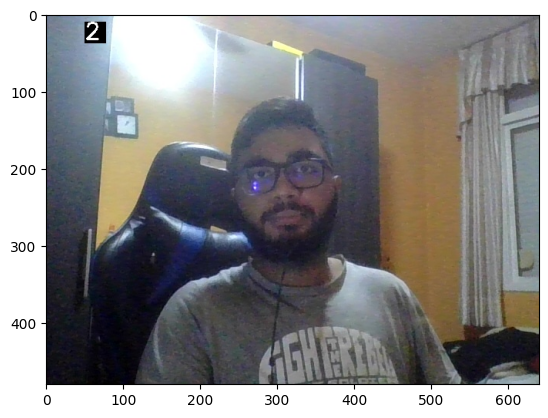

41 Man white neutral


'if (auth_verified and genero == "Man"):\n    df = DeepFace.find(img_path = img3, db_path = "datasets/DatabaseGender59x65/Male", distance_metric = metrics[0], prog_bar = False, enforce_detection=False)\n    print(df)\n\nelif (auth_verified and genero == "Woman"):\n    df = DeepFace.find(img_path = img3, db_path = "datasets/DatabaseGender59x65/Female", enforce_detection=False)\n    print(df) '

In [7]:
img3 = cv2.imread("face_recognition_images/Nikhil/Nikhil2.jpg")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
obj = DeepFace.analyze(img_path = img3, actions = ['age', 'gender', 'race', 'emotion'], enforce_detection=False)
edad = obj['age']
genero = obj['gender']
raza = obj['dominant_race']
emocion = obj['dominant_emotion']

plt.figure()
plt.imshow(img3)
#plt.title(str(edad)+" " + genero + " " + raza + " " + emocion)
plt.show()
print(edad,genero,raza,emocion)

'''if (auth_verified and genero == "Man"):
    df = DeepFace.find(img_path = img3, db_path = "datasets/DatabaseGender59x65/Male", distance_metric = metrics[0], prog_bar = False, enforce_detection=False)
    print(df)

elif (auth_verified and genero == "Woman"):
    df = DeepFace.find(img_path = img3, db_path = "datasets/DatabaseGender59x65/Female", enforce_detection=False)
    print(df) '''

In [8]:
'''if raza == "white":
    img_flag = cv2.imread("flags_images/italia.jpg")
elif raza == "asian":
    img_flag = cv2.imread("flags_images/china.jpg")
elif raza == "indian":
    img_flag = cv2.imread("flags_images/india.jpg")
elif raza == "middle eastern":
    img_flag = cv2.imread("flags_images/arabia.jpg")
elif raza == "latino hispanic":
    img_flag = cv2.imread("flags_images/spain.jpg")
elif raza == "black":
    img_flag = cv2.imread("flags_images/congo.jpg")

img_flag = cv2.cvtColor(img_flag, cv2.COLOR_BGR2RGB)
img_flag = cv2.resize(img_flag, (150, 100))

img3[img3.shape[0]-100:img3.shape[0], img3.shape[1]-150:img3.shape[1]] = img_flag
plt.imshow(img3)
plt.show()'''


'if raza == "white":\n    img_flag = cv2.imread("flags_images/italia.jpg")\nelif raza == "asian":\n    img_flag = cv2.imread("flags_images/china.jpg")\nelif raza == "indian":\n    img_flag = cv2.imread("flags_images/india.jpg")\nelif raza == "middle eastern":\n    img_flag = cv2.imread("flags_images/arabia.jpg")\nelif raza == "latino hispanic":\n    img_flag = cv2.imread("flags_images/spain.jpg")\nelif raza == "black":\n    img_flag = cv2.imread("flags_images/congo.jpg")\n\nimg_flag = cv2.cvtColor(img_flag, cv2.COLOR_BGR2RGB)\nimg_flag = cv2.resize(img_flag, (150, 100))\n\nimg3[img3.shape[0]-100:img3.shape[0], img3.shape[1]-150:img3.shape[1]] = img_flag\nplt.imshow(img3)\nplt.show()'

In [ ]:
print(df.at[0, 'VGG-Face_cosine'])
print(df.at[0, 'identity'])

KeyError: 'VGG-Face_cosine'